## Comparison of Toront, New York City, and Beijing

In [1]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# !pip install geopy
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
# !pip install folium
import folium
import json 
from geopy.geocoders import Nominatim 
import requests
from pandas.io.json import json_normalize
# !pip install matplotlib_venn
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3

### Import Datasets

#### Import Toronto data

In [2]:
#get table
url_tor = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
page = urllib.request.urlopen(url_tor)
data = BeautifulSoup(page, "lxml")

In [3]:
all_tables=data.find_all("table")
all_tables

[<table class="wikitable sortable">
 <tbody><tr>
 <th>Postal Code
 </th>
 <th>Borough
 </th>
 <th>Neighborhood
 </th></tr>
 <tr>
 <td>M1A
 </td>
 <td>Not assigned
 </td>
 <td>Not assigned
 </td></tr>
 <tr>
 <td>M2A
 </td>
 <td>Not assigned
 </td>
 <td>Not assigned
 </td></tr>
 <tr>
 <td>M3A
 </td>
 <td>North York
 </td>
 <td>Parkwoods
 </td></tr>
 <tr>
 <td>M4A
 </td>
 <td>North York
 </td>
 <td>Victoria Village
 </td></tr>
 <tr>
 <td>M5A
 </td>
 <td>Downtown Toronto
 </td>
 <td>Regent Park, Harbourfront
 </td></tr>
 <tr>
 <td>M6A
 </td>
 <td>North York
 </td>
 <td>Lawrence Manor, Lawrence Heights
 </td></tr>
 <tr>
 <td>M7A
 </td>
 <td>Downtown Toronto
 </td>
 <td>Queen's Park, Ontario Provincial Government
 </td></tr>
 <tr>
 <td>M8A
 </td>
 <td>Not assigned
 </td>
 <td>Not assigned
 </td></tr>
 <tr>
 <td>M9A
 </td>
 <td>Etobicoke
 </td>
 <td>Islington Avenue, Humber Valley Village
 </td></tr>
 <tr>
 <td>M1B
 </td>
 <td>Scarborough
 </td>
 <td>Malvern, Rouge
 </td></tr>
 <tr>
 <td>M2B


In [4]:
right_table=data.find('table', class_='wikitable sortable')
right_table

<table class="wikitable sortable">
<tbody><tr>
<th>Postal Code
</th>
<th>Borough
</th>
<th>Neighborhood
</th></tr>
<tr>
<td>M1A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M2A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3A
</td>
<td>North York
</td>
<td>Parkwoods
</td></tr>
<tr>
<td>M4A
</td>
<td>North York
</td>
<td>Victoria Village
</td></tr>
<tr>
<td>M5A
</td>
<td>Downtown Toronto
</td>
<td>Regent Park, Harbourfront
</td></tr>
<tr>
<td>M6A
</td>
<td>North York
</td>
<td>Lawrence Manor, Lawrence Heights
</td></tr>
<tr>
<td>M7A
</td>
<td>Downtown Toronto
</td>
<td>Queen's Park, Ontario Provincial Government
</td></tr>
<tr>
<td>M8A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M9A
</td>
<td>Etobicoke
</td>
<td>Islington Avenue, Humber Valley Village
</td></tr>
<tr>
<td>M1B
</td>
<td>Scarborough
</td>
<td>Malvern, Rouge
</td></tr>
<tr>
<td>M2B
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3B
</td>
<td>

In [5]:
A=[]
B=[]
C=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        
df=pd.DataFrame(A,columns=['Postal Code'])
df['Borough']=B
df['Neighborhood']=C

df.head(5)

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [6]:
#clean data
indexnames = df[df['Borough'].str.contains('Not assigned')].index
df.drop(indexnames, inplace = True)

In [7]:
df = df.reset_index(drop=True)
df = df.replace('\n','', regex=True)
df

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [8]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_1bab0aeef8cc4aba968a7303fbd8954c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='cJCS782qjM895_8qG3MHemoSnT676gtkn7snEbZ8l2Q7',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_1bab0aeef8cc4aba968a7303fbd8954c.get_object(Bucket='capstoneproject-donotdelete-pr-4hgq4g1jminbx3',Key='Geospatial_Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [9]:
#merge two datasets
merged_left = pd.merge(df, df_data_1, on='Postal Code')
merged_left.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [10]:
#Downtown Toronto is Downtown Toronto
Toronto_data = merged_left[merged_left['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
Toronto_data.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


In [11]:
print('The dataframe has {} neighborhoods.'.format(
        len(Toronto_data['Neighborhood'].unique())))

The dataframe has 19 neighborhoods.


#### Import NYC

In [12]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [13]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
neighborhoods_data = newyork_data['features']
neighborhoods_data 

[{'type': 'Feature',
  'id': 'nyu_2451_34572.1',
  'geometry': {'type': 'Point',
   'coordinates': [-73.84720052054902, 40.89470517661]},
  'geometry_name': 'geom',
  'properties': {'name': 'Wakefield',
   'stacked': 1,
   'annoline1': 'Wakefield',
   'annoline2': None,
   'annoline3': None,
   'annoangle': 0.0,
   'borough': 'Bronx',
   'bbox': [-73.84720052054902,
    40.89470517661,
    -73.84720052054902,
    40.89470517661]}},
 {'type': 'Feature',
  'id': 'nyu_2451_34572.2',
  'geometry': {'type': 'Point',
   'coordinates': [-73.82993910812398, 40.87429419303012]},
  'geometry_name': 'geom',
  'properties': {'name': 'Co-op City',
   'stacked': 2,
   'annoline1': 'Co-op',
   'annoline2': 'City',
   'annoline3': None,
   'annoangle': 0.0,
   'borough': 'Bronx',
   'bbox': [-73.82993910812398,
    40.87429419303012,
    -73.82993910812398,
    40.87429419303012]}},
 {'type': 'Feature',
  'id': 'nyu_2451_34572.3',
  'geometry': {'type': 'Point',
   'coordinates': [-73.82780644716412, 

In [14]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
neighborhoods = pd.DataFrame(columns=column_names)
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [15]:
#Downtown NYC is Manhattan
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [16]:
print('The dataframe has {} neighborhoods.'.format(
        len(manhattan_data['Neighborhood'].unique())))

The dataframe has 40 neighborhoods.


#### Import Beijing data

In [17]:
body = client_1bab0aeef8cc4aba968a7303fbd8954c.get_object(Bucket='capstoneproject-donotdelete-pr-4hgq4g1jminbx3',Key='Beijing_District.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

beijing = pd.read_csv(body)
beijing['District'].unique()

array(['Changping', 'Chaoyang', 'Daxing', 'Dongcheng', 'Fangshan',
       'Fengtai', 'Haidian', 'Huairou', 'Mentougou', 'Pinggu',
       'Shijingshan', 'Shunyi', 'Tongzhou', 'Xicheng', 'Miyun', 'Yanqing'],
      dtype=object)

In [18]:
beijing.rename(columns={'District':'Borough','Subdisctricts':'Neighborhood'}, inplace=True)
beijing.head()
#Beijing downtown is Dongcheng and Xicheng
Beijing_district = beijing[beijing['Borough'].str.contains('cheng') ].reset_index(drop=True)
Beijing_district.head()

,City,Borough,Neighborhood
0,Beijing,Dongcheng,Jingshan
1,Beijing,Dongcheng,Donghuamen
2,Beijing,Dongcheng,Jiaodaokou
3,Beijing,Dongcheng,Andingmen
4,Beijing,Dongcheng,Beixinqiao


In [19]:
#create neighbourhoods information
bj_neighborhoods= pd.DataFrame(columns = ['City','Borough','Neighborhood'])

for ii in range(Beijing_district.shape[0]):
    borough = Beijing_district.loc[ii,'Borough']
    neighborhood = Beijing_district.loc[ii,'Neighborhood']
      
    #find the location data, ignore the neighborhoods that are unable to be located by Nominatim
    geolocator = Nominatim(user_agent="my-application")
    location = geolocator.geocode("{},{},Beijing,China".format(neighborhood,borough))
    
    #try one more searching
    if location is None: 
        location = geolocator.geocode("{},Beijing,China".format(neighborhood))
        
    if location is None: 
        print("The location data of {} in {} is not available!".format(neighborhood,borough))
    else:
        bj_neighborhoods = bj_neighborhoods.append({'City': 'Beijing',
                                                'Borough': borough,
                                                'Neighborhood': neighborhood,
                                                'Latitude': location.latitude,
                                                'Longitude': location.longitude
                                               }, ignore_index=True)

#only 6 locations don't have cooridinates, but it doesn't influence the analysis

The location data of Dingsi in Dongcheng is not available!
The location data of Changwenmenwai in Dongcheng is not available!
The location data of Dasheng in Xicheng is not available!
The location data of Dazhalan in Xicheng is not available!
The location data of Chunshu in Xicheng is not available!
The location data of Baizhifang in Xicheng is not available!


In [20]:
bj_neighborhoods.head()
bj_neighborhoods = bj_neighborhoods.drop('City', axis = 1)

In [21]:
bj_neighborhoods['Borough'] = 'Downtown Beijing'
beijing_data = bj_neighborhoods.copy()
beijing_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Downtown Beijing,Jingshan,39.927006,116.392088
1,Downtown Beijing,Donghuamen,39.913594,116.395206
2,Downtown Beijing,Jiaodaokou,39.937807,116.402343
3,Downtown Beijing,Andingmen,39.947729,116.402067
4,Downtown Beijing,Beixinqiao,39.939383,116.410870


In [22]:
print('The dataframe has {} neighborhoods.'.format(
        len(beijing_data['Neighborhood'].unique())))

The dataframe has 26 neighborhoods.


### ADD Venue information for 3 cities

In [23]:
#use Foursquare
CLIENT_ID = 'J0M4N0VALCKPI20001ZXUN5H1EY3WF52SXMZ10PB5C4QLCDA' 
CLIENT_SECRET = 'KS0UKP4UVZJOT53VETCODUHUBY1ST5A3QU0JNHRAHVONXIBI' 
VERSION = '20180605' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

LIMIT = 100
radius = 500

Your credentails:
CLIENT_ID: J0M4N0VALCKPI20001ZXUN5H1EY3WF52SXMZ10PB5C4QLCDA
CLIENT_SECRET:KS0UKP4UVZJOT53VETCODUHUBY1ST5A3QU0JNHRAHVONXIBI


In [24]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [25]:
#define a function of get nearby venues
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [26]:
def getvenuesdetails(city):
    city.loc[0, 'Neighborhood']
    neighborhood_latitude = city.loc[0, 'Latitude'] 
    neighborhood_longitude = city.loc[0, 'Longitude'] 
    
    url =  'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

    neighborhood_name = city.loc[0, 'Neighborhood'] 

    results = requests.get(url).json()

    venues = results['response']['groups'][0]['items']

    nearby_venues = json_normalize(venues) # flatten JSON

    # filter columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    nearby_venues = nearby_venues.loc[:, filtered_columns]

    # filter the category for each row
    nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

    # clean columns
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

    city_venues = getNearbyVenues(names=city['Neighborhood'],
                                       latitudes=city['Latitude'],
                                       longitudes=city['Longitude'])
    print(city_venues.shape)
    print(city_venues.groupby('Neighborhood').count())
    print('There are {} uniques categories.'.format(len(city_venues['Venue Category'].unique())))
    
    return city_venues

In [28]:
Toronto_venue = getvenuesdetails(Toronto_data)
Toronto_venue['city'] = 'Toronto'
Toronto_venue.head()

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Stn A PO Boxes
St. James Town, Cabbagetown
First Canadian Place, Underground city
Church and Wellesley
(1218, 7)
                                                    Neighborhood Latitude  \
Neighborhood                                                                
Berczy Park                                                            56   
CN Tower, King and Spadina, Railway Lands, Harb...                     16   
Central Bay Street                                                     64   
Christie        

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,city
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery,Toronto
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop,Toronto
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center,Toronto
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa,Toronto
4,"Regent Park, Harbourfront",43.65426,-79.360636,Dominion Pub and Kitchen,43.656919,-79.358967,Pub,Toronto


In [29]:
NYC_venue = getvenuesdetails(manhattan_data)
NYC_venue['city'] = 'New York'
NYC_venue

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards
(3140, 7)
                     Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                                
Battery Park City                       63                      63     63   
Carnegie Hill                           88                      88     88   
Central Harlem                          46                      46     46   
Chelsea                                100                     100    100   
Chinatown   

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,city
0,Marble Hill,40.876551,-73.910660,Arturo's,40.874412,-73.910271,Pizza Place,New York
1,Marble Hill,40.876551,-73.910660,Bikram Yoga,40.876844,-73.906204,Yoga Studio,New York
2,Marble Hill,40.876551,-73.910660,Tibbett Diner,40.880404,-73.908937,Diner,New York
3,Marble Hill,40.876551,-73.910660,Starbucks,40.877531,-73.905582,Coffee Shop,New York
4,Marble Hill,40.876551,-73.910660,Dunkin',40.877136,-73.906666,Donut Shop,New York
5,Marble Hill,40.876551,-73.910660,Rite Aid,40.875467,-73.908906,Pharmacy,New York
6,Marble Hill,40.876551,-73.910660,Astral Fitness & Wellness Center,40.876705,-73.906372,Gym,New York
7,Marble Hill,40.876551,-73.910660,Blink Fitness,40.877271,-73.905595,Gym,New York
8,Marble Hill,40.876551,-73.910660,Starbucks,40.873755,-73.908613,Coffee Shop,New York
9,Marble Hill,40.876551,-73.910660,TCR The Club of Riverdale,40.878628,-73.914568,Tennis Stadium,New York


In [30]:
Beijing_venue = getvenuesdetails(beijing_data)
Beijing_venue['city'] = 'Beijing'
Beijing_venue

Jingshan
Donghuamen
Jiaodaokou
Andingmen
Beixinqiao
Chaoyangmen
Jianguomen
Dongzhimen
Hepingli
Qianmen
Donghuashi
Longtan
Tiyuguan
Tiantan
Yongdingmenwai
Jinrong
West Chang'an
Xinjiekou
Yuetan
Zhanlan Road
Shichahai
Tianqiao
Taoranting
Guang'anmennei
Niujie
Guang'anmenwai
(362, 7)
                Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                           
Andingmen                          23                      23     23   
Beixinqiao                         25                      25     25   
Chaoyangmen                        17                      17     17   
Donghuamen                         23                      23     23   
Donghuashi                          4                       4      4   
Dongzhimen                         31                      31     31   
Guang'anmennei                      9                       9      9   
Guang'anmenwai                      4                       4      4  

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,city
0,Jingshan,39.927006,116.392088,Jingshan Park (景山公园),39.923536,116.390576,Park,Beijing
1,Jingshan,39.927006,116.392088,Wanchun Pavilion (万春亭),39.923489,116.390420,Historic Site,Beijing
2,Jingshan,39.927006,116.392088,City Walls Courtyard House Beijing,39.928131,116.392442,Hostel,Beijing
3,Jingshan,39.927006,116.392088,TRB Hutong,39.926528,116.397204,French Restaurant,Beijing
4,Jingshan,39.927006,116.392088,The Central Point of Beijing City (北京城中心点),39.923456,116.390407,Scenic Lookout,Beijing
5,Jingshan,39.927006,116.392088,Alley Cafe,39.923973,116.393513,Café,Beijing
6,Jingshan,39.927006,116.392088,Man Fu Lou (满福楼大酒楼),39.928046,116.390397,Hotpot Restaurant,Beijing
7,Jingshan,39.927006,116.392088,皇家冰窖小院,39.928844,116.387190,Chinese Restaurant,Beijing
8,Jingshan,39.927006,116.392088,Dongzhimen Train Station Metro Station,39.925579,116.395010,Metro Station,Beijing
9,Jingshan,39.927006,116.392088,Shatan Hotel Beijing 北京沙滩宾馆,39.924032,116.394973,Hotel,Beijing


#### To cluster the information, let's cluster the venue for each city at first

In [31]:
def return_most_common_venues(row, num_common_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_common_venues]

In [33]:
#streamlize the cluster function
def cluster(venue, num_top_venues, num_common_venues, kclusters, data):
    # one hot encoding
    onehot = pd.get_dummies(venue[['Venue Category']], prefix="", prefix_sep="")
    onehot['Neighborhood'] = venue['Neighborhood'] 
    # move neighborhood column to the first column
    fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
    onehot = onehot[fixed_columns]
    onehot.head()
    
    grouped = onehot.groupby('Neighborhood').mean().reset_index()

    cluster
    for hood in grouped['Neighborhood']:
        print("----"+hood+"----")
        temp = grouped[grouped['Neighborhood'] == hood].T.reset_index()
        temp.columns = ['venue','freq']
        temp = temp.iloc[1:]
        temp['freq'] = temp['freq'].astype(float)
        temp = temp.round({'freq': 2})
    #     print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))

    indicators = ['st', 'nd', 'rd']

    # create columns according to number of top venues
    columns = ['Neighborhood']
    for ind in np.arange(num_common_venues):
        try:
            columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        except:
            columns.append('{}th Most Common Venue'.format(ind+1))

    # create a new dataframe
    neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
    neighborhoods_venues_sorted['Neighborhood'] = grouped['Neighborhood']

    for ind in np.arange(grouped.shape[0]):
        neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_common_venues)

    #set clusters
    grouped_clustering = grouped.drop('Neighborhood', 1)

    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

    # add clustering labels
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

    city_data = data
    city_data = city_data.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood').sort_values(by = 'Cluster Labels')
#     city_data = city_data[['Borough', 'Cluster Labels', '1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue']]
    return city_data

In [34]:
Toronto_cluster = cluster(Toronto_venue, 5, 3, 5, Toronto_data)
Toronto_cluster

----Berczy Park----
----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
----Central Bay Street----
----Christie----
----Church and Wellesley----
----Commerce Court, Victoria Hotel----
----First Canadian Place, Underground city----
----Garden District, Ryerson----
----Harbourfront East, Union Station, Toronto Islands----
----Kensington Market, Chinatown, Grange Park----
----Queen's Park, Ontario Provincial Government----
----Regent Park, Harbourfront----
----Richmond, Adelaide, King----
----Rosedale----
----St. James Town----
----St. James Town, Cabbagetown----
----Stn A PO Boxes----
----Toronto Dominion Centre, Design Exchange----
----University of Toronto, Harbord----


,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Pub,Park
16,M4X,Downtown Toronto,"St. James Town, Cabbagetown",43.667967,-79.367675,0,Café,Coffee Shop,Italian Restaurant
15,M5W,Downtown Toronto,Stn A PO Boxes,43.646435,-79.374846,0,Coffee Shop,Café,Hotel
12,M5T,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",43.653206,-79.400049,0,Café,Vegetarian / Vegan Restaurant,Bakery
11,M5S,Downtown Toronto,"University of Toronto, Harbord",43.662696,-79.400049,0,Café,Bar,Italian Restaurant
10,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817,0,Coffee Shop,Restaurant,Café
17,M5X,Downtown Toronto,"First Canadian Place, Underground city",43.648429,-79.382280,0,Coffee Shop,Café,Restaurant
8,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,0,Coffee Shop,Aquarium,Café
9,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576,0,Coffee Shop,Hotel,Café
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,Coffee Shop,Cocktail Bar,Bakery


In [35]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [36]:
Toronto_array = Toronto_cluster[['1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue']]
Toronto_common = Toronto_array.apply(pd.value_counts).fillna('0').astype(int)
# Toronto_cluster.groupby('1st Most Common Venue').size().sort_values(ascending = False)
# Toronto_cluster.groupby('2nd Most Common Venue').size().sort_values(ascending = False)
#we can find that most common venue is coffee shop or cafe
#sum 3 columns to get the general common venue information
Toronto_common['Sum'] = Toronto_common.iloc[:,0:3].sum(axis = 1)
Toronto_common.style.apply(highlight_max)

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Sum
Airport Lounge,0,1,0,1
Airport Service,1,0,0,1
Airport Terminal,0,0,1,1
Aquarium,0,1,0,1
Bakery,0,0,2,2
Bar,0,1,0,1
Café,4,4,3,11
Clothing Store,1,0,0,1
Cocktail Bar,0,1,0,1
Coffee Shop,11,3,0,14


In [37]:
NYC_cluster = cluster(NYC_venue, 5, 3, 5, manhattan_data)
NYC_cluster

----Battery Park City----
----Carnegie Hill----
----Central Harlem----
----Chelsea----
----Chinatown----
----Civic Center----
----Clinton----
----East Harlem----
----East Village----
----Financial District----
----Flatiron----
----Gramercy----
----Greenwich Village----
----Hamilton Heights----
----Hudson Yards----
----Inwood----
----Lenox Hill----
----Lincoln Square----
----Little Italy----
----Lower East Side----
----Manhattan Valley----
----Manhattanville----
----Marble Hill----
----Midtown----
----Midtown South----
----Morningside Heights----
----Murray Hill----
----Noho----
----Roosevelt Island----
----Soho----
----Stuyvesant Town----
----Sutton Place----
----Tribeca----
----Tudor City----
----Turtle Bay----
----Upper East Side----
----Upper West Side----
----Washington Heights----
----West Village----
----Yorkville----


,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
19,Manhattan,East Village,40.727847,-73.982226,0,Bar,Cocktail Bar,Pizza Place
1,Manhattan,Chinatown,40.715618,-73.994279,0,Chinese Restaurant,Bakery,Dessert Shop
33,Manhattan,Midtown South,40.748510,-73.988713,0,Korean Restaurant,Hotel,Dessert Shop
27,Manhattan,Gramercy,40.737210,-73.981376,0,Bar,Coffee Shop,Italian Restaurant
25,Manhattan,Manhattan Valley,40.797307,-73.964286,0,Coffee Shop,Bar,Mexican Restaurant
32,Manhattan,Civic Center,40.715229,-74.005415,1,Coffee Shop,Gym / Fitness Center,French Restaurant
29,Manhattan,Financial District,40.707107,-74.010665,1,Coffee Shop,American Restaurant,Bar
28,Manhattan,Battery Park City,40.711932,-74.016869,1,Park,Hotel,Coffee Shop
16,Manhattan,Murray Hill,40.748303,-73.978332,1,Sandwich Place,Coffee Shop,Japanese Restaurant
15,Manhattan,Midtown,40.754691,-73.981669,1,Coffee Shop,Hotel,Theater


In [38]:
NYC_array = NYC_cluster[['1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue']]
NYC_common = NYC_array.apply(pd.value_counts).fillna('0').astype(int)
# NYC_cluster.groupby('1st Most Common Venue').size().sort_values(ascending = False)
#we can find that most common venue is Italian Restaurant and coffee shop or cafe
#sum 3 columns to get the general common venue information
NYC_common['Sum'] = NYC_common.iloc[:,0:3].sum(axis = 1)
NYC_common.style.apply(highlight_max)

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Sum
African Restaurant,1,0,0,1
American Restaurant,0,3,2,5
Art Gallery,0,1,0,1
Bakery,1,2,2,5
Bar,2,2,1,5
Boat or Ferry,1,0,0,1
Bookstore,1,0,0,1
Boutique,0,0,1,1
Café,3,2,4,9
Chinese Restaurant,1,2,1,4


In [39]:
Beijing_cluster = cluster(Beijing_venue, 5, 3, 5, beijing_data)
Beijing_cluster

----Andingmen----
----Beixinqiao----
----Chaoyangmen----
----Donghuamen----
----Donghuashi----
----Dongzhimen----
----Guang'anmennei----
----Guang'anmenwai----
----Hepingli----
----Jianguomen----
----Jiaodaokou----
----Jingshan----
----Jinrong----
----Longtan----
----Niujie----
----Qianmen----
----Shichahai----
----Taoranting----
----Tianqiao----
----Tiantan----
----Tiyuguan----
----West Chang'an----
----Xinjiekou----
----Yongdingmenwai----
----Yuetan----
----Zhanlan Road----


,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
18,Downtown Beijing,Yuetan,39.912636,116.337296,0,Chinese Restaurant,Grocery Store,Hubei Restaurant
14,Downtown Beijing,Yongdingmenwai,39.864944,116.393147,0,Chinese Restaurant,Metro Station,Zhejiang Restaurant
24,Downtown Beijing,Niujie,39.884372,116.358414,0,Chinese Restaurant,Hotel,Xinjiang Restaurant
10,Downtown Beijing,Donghuashi,39.897357,116.429208,0,Chinese Restaurant,Mobile Phone Shop,Hotel
17,Downtown Beijing,Xinjiekou,39.939429,116.361274,0,Chinese Restaurant,BBQ Joint,Hotel
1,Downtown Beijing,Donghuamen,39.913594,116.395206,1,Historic Site,Chinese Restaurant,Hotel
16,Downtown Beijing,West Chang'an,39.906272,116.389441,1,Historic Site,Park,Castle
13,Downtown Beijing,Tiantan,39.879868,116.402950,2,Temple,Plaza,Historic Site
15,Downtown Beijing,Jinrong,39.919960,116.353594,3,Coffee Shop,Hunan Restaurant,Stadium
9,Downtown Beijing,Qianmen,39.898759,116.391641,3,Hotel,Coffee Shop,Fast Food Restaurant


In [40]:
Beijing_array = Beijing_cluster[['1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue']]
Beijing_common = Beijing_array.apply(pd.value_counts).fillna('0').astype(int)
# Beijing_cluster.groupby('1st Most Common Venue').size().sort_values(ascending = False)
#we can find that most common venue is Chinese Restaurant and hotel, but coffee shop is also in the list
Beijing_common['Sum'] = Beijing_common.iloc[:,0:3].sum(axis = 1)
Beijing_common.style.apply(highlight_max)

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Sum
Accessories Store,1,0,0,1
Asian Restaurant,1,0,0,1
BBQ Joint,0,1,0,1
Bakery,0,0,1,1
Bar,0,1,0,1
Beijing Restaurant,1,0,1,2
Café,1,2,1,4
Castle,0,0,1,1
Chinese Restaurant,9,3,1,13
Coffee Shop,2,3,0,5


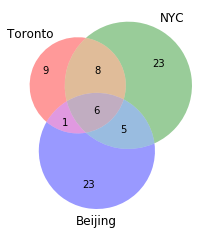

In [41]:
#create venn diagram to show the common venue in a straightforward way
Toronto = set()
NYC = set()
Beijing = set()

set_array = []
set_names = ['Toronto', 'NYC', 'Beijing']

  
for i in Toronto_common.index:
    Toronto.add(i)
for i in NYC_common.index:
    NYC.add(i)
for i in Beijing_common.index:
    Beijing.add(i)
    
set_array.append(Toronto)
set_array.append(NYC)
set_array.append(Beijing)

venn3(set_array[0:3], set_names[0:3]) 
plt.show()
#There are 6 types are in 3 cities, lets's find the overlaping types
#NYC is more similar to Toronto, but also keep its features
#Toronto is more similar to NYC, but has less features
#Beijing is more similar to NYC, but also keep its features

In [42]:
pd.merge(pd.merge(Toronto_common,NYC_common,left_index=True, right_index=True),Beijing_common,left_index=True, right_index=True)
#among 6 overlapping categories, cafe, coffeeshop, and hotel has larger value

,1st Most Common Venue_x,2nd Most Common Venue_x,3rd Most Common Venue_x,Sum_x,1st Most Common Venue_y,2nd Most Common Venue_y,3rd Most Common Venue_y,Sum_y,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Sum
Bakery,0,0,2,2,1,2,2,5,0,0,1,1
Bar,0,1,0,1,2,2,1,5,0,1,0,1
Café,4,4,3,11,3,2,4,9,1,2,1,4
Coffee Shop,11,3,0,14,7,8,3,18,2,3,0,5
Hotel,0,1,1,2,1,3,0,4,4,3,4,11
Park,1,0,2,3,2,3,2,7,0,3,1,4


In [43]:
#find unique categories
Toronto_exp = Toronto_common.copy().reset_index()
NYC_exp = NYC_common.copy().reset_index()
Beijing_exp = Beijing_common.copy().reset_index()

exp1 = Toronto_exp.append(NYC_exp).append(Beijing_exp)
exp1 = exp1.drop_duplicates(subset = 'index', keep=False).reset_index().drop('level_0', axis = 1)

exp1[['index','Sum']]

,index,Sum
0,Airport Lounge,1
1,Airport Service,1
2,Airport Terminal,1
3,Aquarium,1
4,Diner,1
5,Gastropub,1
6,Pub,1
7,Trail,1
8,Vegetarian / Vegan Restaurant,1
9,African Restaurant,1


### create maps

#### Toronto

In [44]:
address = 'Toronto'

geolocator = Nominatim(user_agent="Toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

kclusters = 5
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_cluster['Latitude'], Toronto_cluster['Longitude'], Toronto_cluster['Neighborhood'], Toronto_cluster['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
display(map_clusters)

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [45]:
address = 'New York, NY'

geolocator = Nominatim(user_agent="NYC_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

kclusters = 5
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(NYC_cluster['Latitude'], NYC_cluster['Longitude'], NYC_cluster['Neighborhood'], NYC_cluster['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
display(map_clusters)

The geograpical coordinate of Toronto are 40.7127281, -74.0060152.


In [47]:
address = 'Beijing'

geolocator = Nominatim(user_agent="Beijing_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

kclusters = 5
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Beijing_cluster['Latitude'], Beijing_cluster['Longitude'], Beijing_cluster['Neighborhood'], Beijing_cluster['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
display(map_clusters)

The geograpical coordinate of Toronto are 39.906217, 116.3912757.
